# Problem 1: Linear Regression

In [211]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

data = np.genfromtxt("data/curve80.txt", delimiter=None)

X = data[:,0]
X = np.atleast_2d(X).T
Y = data[:,1]
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)

print('Shapes for the objects:\n',
      Xtr.shape,Xte.shape,Ytr.shape,Yte.shape)

Shapes for the objects:
 (60, 1) (20, 1) (60,) (20,)


Text(0, 0.5, 'Y')

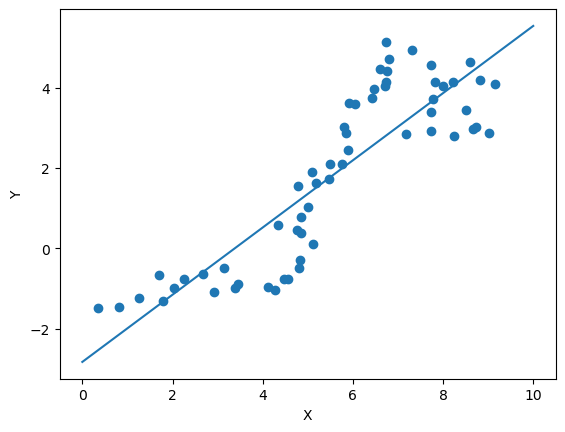

In [212]:
lr = ml.linear.linearRegress(Xtr, Ytr)
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict(xs)

plt.scatter(Xtr,Ytr)
plt.plot(xs,ys)
plt.xlabel('X')
plt.ylabel('Y')

In [213]:
lr.theta

array([[-2.82765049,  0.83606916]])

In [214]:
YhatTr = lr.predict(Xtr)
mseTr = np.mean(
      np.square(np.subtract(YhatTr,Ytr[:,np.newaxis])))

YhatTe = lr.predict(Xte)
mseTe = np.mean(
      np.square(np.subtract(YhatTe,Yte[:,np.newaxis])))

print('Training MSE:',mseTr,'\nTest MSE:',mseTe)

Training MSE: 1.127711955609391 
Test MSE: 2.242349203010125


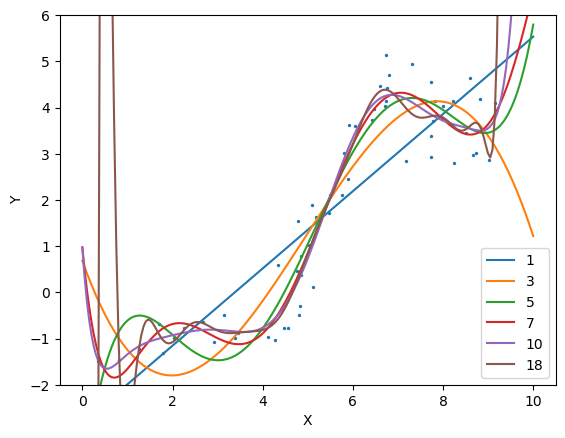

In [215]:
xs = np.linspace(0,10,200)[:,np.newaxis]

def train_lr(degree,xs):
      XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
      XtrP,params = ml.transforms.rescale(XtrP)
      lr = ml.linear.linearRegress(XtrP, Ytr)

      XteP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,False), params)

      YhatTr = lr.predict(XtrP)
      YhatTe = lr.predict(XteP)

      mseTr = np.mean(
      np.square(np.subtract(YhatTr,Ytr[:,np.newaxis])))

      mseTe = np.mean(
      np.square(np.subtract(YhatTe,Yte[:,np.newaxis])))

      xsP,_ = ml.transforms.rescale(
            ml.transforms.fpoly(xs, degree, bias=False),
            params)
      ys = lr.predict(xsP)

      return ys, mseTr, mseTe

ys1, mseTr1, mseTe1 = train_lr(1,xs)
ys3, mseTr3, mseTe3 = train_lr(3,xs)
ys5, mseTr5, mseTe5 = train_lr(5,xs)
ys7, mseTr7, mseTe7 = train_lr(7,xs)
ys10, mseTr10, mseTe10 = train_lr(10,xs)
ys18, mseTr18, mseTe18 = train_lr(18,xs)

plt.plot(xs,np.concatenate((
      ys1,ys3,ys5,ys7,ys10,ys18
),axis=1),label = (1,3,5,7,10,18))
plt.scatter(Xtr,Ytr,s=2)
plt.legend(loc='lower right')
plt.ylim((-2,6))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

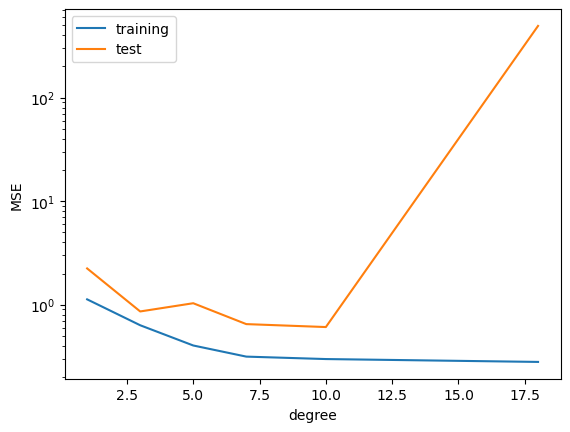

In [216]:
plt.semilogy((1,3,5,7,10,18),
             (mseTr1,mseTr3,mseTr5,mseTr7,mseTr10,mseTr18),
             label = 'training')
plt.semilogy((1,3,5,7,10,18),
             (mseTe1,mseTe3,mseTe5,mseTe7,mseTe10,mseTe18),
             label = 'test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend(loc='upper left')
plt.show()

I recommend degree=10, which makes the model to have the lowest test error.

# Problem 2: Cross-validation

In [217]:
nFolds = 5;
J = np.zeros(5)
for iFold in range(nFolds):
      Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
      learner = ml.linear.linearRegress(Xti,Yti)
      YhatVi = learner.predict(Xvi)
      J[iFold] = np.mean(
      np.square(np.subtract(YhatVi,Yvi[:,np.newaxis])))
print (np.mean(J))

1.2118626629641982


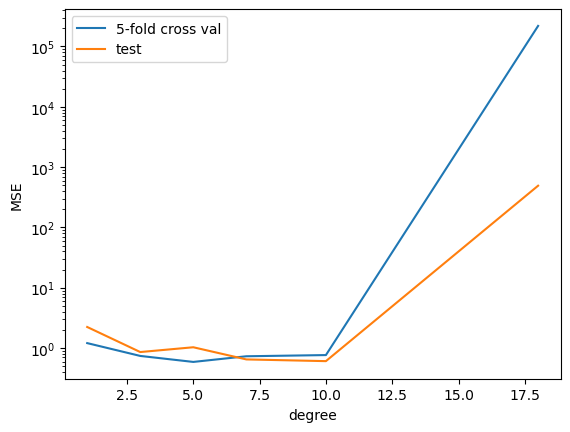

In [218]:
def train_lr_cv(degree,nFolds):
      J = np.zeros(nFolds)

      for iFold in range(nFolds):
            Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
            XtiP = ml.transforms.fpoly(Xti, degree, bias=False)
            XtiP,params = ml.transforms.rescale(XtiP)
            lr = ml.linear.linearRegress(XtiP,Yti)

            XviP,_ = ml.transforms.rescale(ml.transforms.fpoly(Xvi,degree,False), params)
            YhatVi = lr.predict(XviP)

            J[iFold] = np.mean(
            np.square(np.subtract(YhatVi,Yvi[:,np.newaxis])))

      return np.mean(J)

mseVi1 = train_lr_cv(1,5)
mseVi3 = train_lr_cv(3,5)
mseVi5 = train_lr_cv(5,5)
mseVi7 = train_lr_cv(7,5)
mseVi10 = train_lr_cv(10,5)
mseVi18 = train_lr_cv(18,5)

plt.semilogy((1,3,5,7,10,18),
             (mseVi1,mseVi3,mseVi5,mseVi7,mseVi10,mseVi18),
             label = '5-fold cross val')
plt.semilogy((1,3,5,7,10,18),
             (mseTe1,mseTe3,mseTe5,mseTe7,mseTe10,mseTe18),
             label = 'test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend(loc='upper left')
plt.show()

5-fold cross validation error and test error share similar behavior, both decrease firstly and then increase quickly once passed degree=10.

Based on 5-fold cross validation error, degree=5 is mostly recommended.

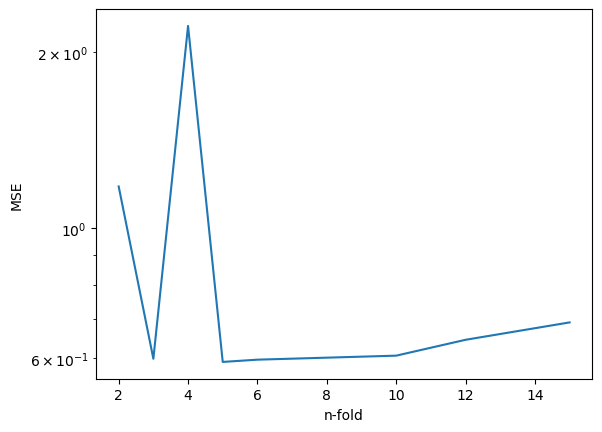

In [223]:
mseVi5f2 = train_lr_cv(5,2)
mseVi5f3 = train_lr_cv(5,3)
mseVi5f4 = train_lr_cv(5,4)
mseVi5f5 = train_lr_cv(5,5)
mseVi5f6 = train_lr_cv(5,6)
mseVi5f10 = train_lr_cv(5,10)
mseVi5f12 = train_lr_cv(5,12)
mseVi5f15 = train_lr_cv(5,15)

plt.semilogy((2,3,4,5,6,10,12,15),
             (mseVi5f2,mseVi5f3,mseVi5f4,mseVi5f5,
              mseVi5f6,mseVi5f10,mseVi5f12,mseVi5f15))
plt.xlabel('n-fold')
plt.ylabel('MSE')
plt.show()

The n-fold cross validation error has a fluctuating behavior when n<5, then it increases slightly. The error becomes stable as n becomes larger because more data can be used for training purpose in each fold, and more folds result in a higher confidence. The error eventually increases because fewer data are assigned to be validation data, thus confidence of validation drops.

# Statement of Collaboration
This homework was done completely by Jiachen Sun without collaboration.